<a href="https://colab.research.google.com/github/DeepthiManthapuram/EDA/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Employee ID': [1, 2, 3, 4, 5],
    'Job Title': ['Junior Developer', 'Senior Developer', 'Manager', 'Junior Developer', 'Manager']
})

# One-hot encode the 'Job Title' column
one_hot_encoded = pd.get_dummies(data['Job Title'], prefix='Is')

# Combine with original data
data_encoded = pd.concat([data, one_hot_encoded], axis=1)

print(data_encoded)





   Employee ID         Job Title  Is_Junior Developer  Is_Manager  \
0            1  Junior Developer                 True       False   
1            2  Senior Developer                False       False   
2            3           Manager                False        True   
3            4  Junior Developer                 True       False   
4            5           Manager                False        True   

   Is_Senior Developer  
0                False  
1                 True  
2                False  
3                False  
4                False  


In [ ]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

sns.set_theme(style='whitegrid')

#mount your drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/loan_approved (1).csv'

df = pd.read_csv(path)

print(df.shape)
print(df.info())
#column types
print(df.dtypes)

#checking missing values
print(df.isnull().sum())
df.dropna()

df.drop_duplicates(inplace=True)
df.reset_index()


 # Fill missing values based on column types
# Nominal columns
nominal_cols = ['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Loan_Status (Approved)']

# Ordinal columns
ordinal_cols = ['Education', 'Dependents']

# Discrete / Numerical columns
discrete_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

# Continuous columns
continuous_cols = ['LoanAmount']

# Filling missing values
for col in nominal_cols + ordinal_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in discrete_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in continuous_cols:
    df[col].fillna(df[col].median(), inplace=True)  # median for skewed distributions

# Check if any missing values remain
missing_values = df.isnull().sum()
print("missing values\n",missing_values)

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy of the original dataframe to show encoding
df_encoded = df.copy()

# ----------------------------
# Label Encoding for ordinal columns
# ----------------------------
le = LabelEncoder()
for col in ordinal_cols:
    df_encoded[col + "_label_encoded"] = le.fit_transform(df_encoded[col])
    print(f"Label Encoding for {col}:")
    print(df_encoded[[col, col + "_label_encoded"]].head(), "\n")

# ----------------------------
# One-Hot Encoding for nominal columns
# ----------------------------
df_onehot = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=False)

print("One-Hot Encoding for nominal columns:")
for col in nominal_cols:
    print(f"\nColumn: {col}")
    # show only the new one-hot columns related to this column
    onehot_cols = [c for c in df_onehot.columns if col in c]
    print(df_onehot[onehot_cols].head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Stat

/tmp/ipython-input-2531623858.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2531623858.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

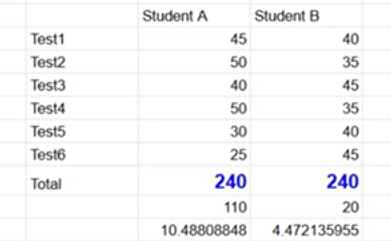

In [ ]:
#which student is better?

#to analyse the performance of the student find mean and standard deviation
#cross validate - normal distribution-for accuracy
import numpy as np
a=[45,50,40,50,30,25]
b=[40,35,45,35,40,45]
print(np.std(a))
print(np.std(b))



9.574271077563381
4.08248290463863


#z-score formula
x-(mean)/sd

In [ ]:
#identifying outliers
#1.IQR

#2.z-score
zscore=(df["ApplicantIncome"]-df["ApplicantIncome"].mean())/df["ApplicantIncome"].std()
zscore

#steps:
#1.identify outliers with the help of histogram,boxplot,skewness and curtosis(if distribution is not normal)
#2.apply IQR or z-score (check the nature of column whether normal or not,how much normal,check graph and decide)
  #if outliers are high ,data having curtosis or large skewed - IQR
  #if adata is normal and but not exactly as ideal normal case - z-score
#3.if percentage > 10 (can't delete outliers)
  #ex:if 150 out of 600 percentage = 25%
#4.either use clip or ignore the records
#5.if you are keeping outliers, use decision based algorithms
  #if you are keeping outliers,not using decision based algorithms, use svm or kvm or logistic regression.
  #linear - Use tranformation techniques(convert non-normal distribution into normal distribution)

,ApplicantIncome
0,0.072931
1,-0.134302
2,-0.393427
3,-0.461686
4,0.097649
...,...
609,-0.409796
610,-0.212383
611,0.436818
612,0.356773


In [ ]:
df["CoapplicantIncome"].kurtosis()


np.float64(84.95638421103374)

(614, 1)
skewness:  -0.14564645710551902
kurtosis:  -1.8778432766544493


<Axes: ylabel='Count'>

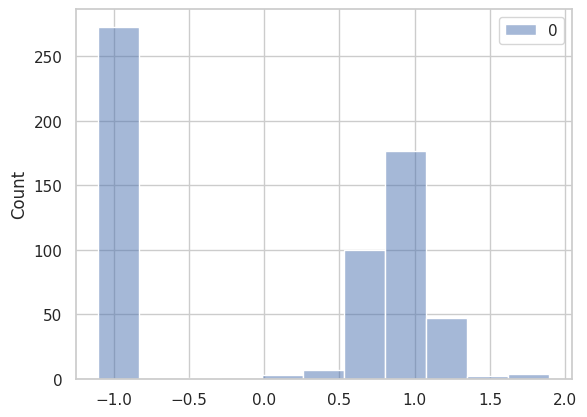

In [ ]:
from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer(method='yeo-johnson')
la_trans = trans.fit_transform(df[["CoapplicantIncome"]])
print(la_trans.shape)

print("skewness: ",pd.Series(la_trans.reshape(614,)).skew())
print("kurtosis: ",pd.Series(la_trans.reshape(614,)).kurtosis())

sns.histplot(la_trans)

np.log(df())

df[LoanAmount]**(3) #outliers effect reduces